# A character one hot based seq2seq neural network
## For using as spell-checker, grammar checker, etc.

The notebook is based on the Spell-checker project.

Data can be found as on Project Gutenberg or as cleaned wikipedia dumps. The neural net will learn, to repeat, that which is found in "./books" folder. The file, or files, will need to have one sentence per line.

To save time for multiple runs, file are saved in folder "./data" and weights of the neural network are saved and reused. Note that reusing only works for the same symbol set and neural net configuration. If you have varying symbols in different data sets (books), run all of them at the same time (put them all in the books folder), and use the offset variable to chew through all of the data piece by piece.

Results:


Masking layer + training loop, all the data (Kilo (1000) sentences)

<table>
<tr><td><td><td><td>Highest<td>scores<td>sentences (10-40)
<tr><td>Size<td>batch<td>tr_acc<td>val_acc<td>test_acc<td>dropout<td>
<tr><td>2000K<td>2048<td><td><td><td>0.1, 0.1, 0.1  
<tr><td>2000K<td>1024<td>99.65<td>99.70<td>99.69<td>0.1, 0.1, 0.1 
<tr><td>2000K<td>512<td>99.80<td>99.78<td>99.79<td>0.05, 0.05, 0.05
</table> 


Masking layer + mixed precision different sizes of data (Kilo (1000) sentences)

<table>
<tr><td><td><td><td>Highest<td>scores<td>sentences (10-40)
<tr><td>Size<td>batch<td>tr_acc<td>val_acc<td>test_acc<td>dropout<td>
<tr><td>200K<td>2048<td>99.91<td>99.24<td>99.23<td>0.1, 0.1, 0.1  
<tr><td>200K<td>1024<td>99.90<td>99.53<td>99.54<td>0.1, 0.1, 0.1 
<tr><td>100K<td>4096<td>99.52<td>98.90<td>98.90<td>0.1, 0.1, 0.1  
<tr><td>100K<td>1024<td>99.82<td>99.01<td>99.01<td>0.1, 0.1, 0.1
</table> 


Mixed precision different sizes of data (Kilo (1000) sentences)

<table>
<tr><td><td><td><td>Highest<td>scores<td>sentences (10-40)
<tr><td>Size<td>batch<td>tr_acc<td>val_acc<td>test_acc<td>dropout<td>
<tr><td>1000K<td>1024<td>OOM     
<tr><td>200K<td>512<td>99.93<td>99.63<td>99.63<td>0.1, 0.1, 0.1    
<tr><td>100K<td>4096<td>99.36<td>98.91<td>98.91<td>0.1, 0.1, 0.1
</table> 

    
Different sizes of data (Kilo (1000) sentences)

<table>
<tr><td><td><td><td>Highest<td>scores<td>sentences (10-40)
<tr><td>Size<td>batch<td>tr_acc<td>val_acc<td>test_acc<td>dropout<td>
<tr><td>1000K<td>32<td>99.84<td>99.81<td>OOM**<td>0.1, 0.1, 0.1
<tr><td>1000K<td>1024<td>OOM**<td><td><td>0.1, 0.1, 0.1
<tr><td>800K<td>1024<td>99.91<td>99.79<td>OOM<td>0.1, 0.1, 0.1
<tr><td>600K<td>1024<td>99.93<td>99.77<td>99.77<td>0.1, 0.1, 0.1
<tr><td>400K<td>1024<td>99.90<td>99.71<td>99.72<td>0.1, 0.1, 0.1
<tr><td>200K<td>2048<td>99.89<td>99.50<td>99.51<td>0.1, 0.1, 0.1     
<tr><td>200K<td>1024<td>99.91*<td>99.53<td>99.54<td>0.1, 0.1, 0.1
<tr><td>100K<td>4096<td>OOM<td><td><td>0.1, 0.1, 0.1
<tr><td>100K<td>3072<td>99.57<td>99.11<td>99.10<td>0.1, 0.1, 0.1
<tr><td>100K<td>2048<td>99.69<td>99.10<td>99.11<td>0.1, 0.1, 0.1
<tr><td>100K<td>1024<td>99.88<td>99.09<td>99.08<td>0.1, 0.1, 0.1
<tr><td>100K<td>768<td>99.86<td>99.25<td>99.24<td>0.1, 0.1, 0.1
<tr><td>100K<td>512<td>99.92<td>99.21<td>99.21<td>0.1, 0.1, 0.1
<tr>
<tr><td><td>     <td>      <td>       <td>        <td>*manually stopped
<tr><td><td>     <td>      <td>       <td>        <td>**Out Of Memory
</table> 
    
    
Different batch sizes
    
<table>
<tr><td><td><td><td>Highest<td>scores 100K sentences (10-40)<td>
<tr><td>batch<td>tr_acc<td>val_acc<td>test_acc<td>regularizers
<tr><td>2048<td>99.76<td>98.79<td>98.78<td>dropout 0.1, 0.1, 0.1
<tr><td>2048<td><td>98.64<td>98.62<td>kernel, bias, activity(only 1 of each)
<tr><td>1024<td>99.80<td>99.04<td>99.04<td>dropout 0.1, 0.1, 0.1
<tr><td>512<td><td>99.01<td>99.00<td>kernel, bias, activity(only 1 of each)
<tr><td>32<td>1.0000<td>99.31<td>99.31<td>kernel, bias, activity(only 1 of each)
</table> 

## Load libraries

In [1]:
import bz2
from   collections                import namedtuple
from   __future__                 import print_function
import numpy                      as     np
import os
from   os                         import listdir
from   os.path                    import isfile, join
import pandas                     as     pd
import matplotlib.pyplot          as     plt
import re
from   sklearn.model_selection    import train_test_split
import tensorflow                 as     tf
from   tensorflow                 import keras
from   tensorflow.keras           import mixed_precision, regularizers
from   tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from   tensorflow.keras.layers    import (Activation, Bidirectional, Concatenate, Dense, 
                                         Input, LSTM, Masking)
from   tensorflow.keras.models    import Model
from   tensorflow.python.client   import device_lib
import time

2022-02-26 02:01:34.436442: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#gpus = tf.config.list_physical_devices('GPU')
#if gpus:
  # Restrict TensorFlow to only use the first GPU
#  try:
#    tf.config.set_visible_devices(gpus[0], 'GPU')
#    logical_gpus = tf.config.list_logical_devices('GPU')
#    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
#    print(e)


In [3]:
#If your gpu runs out of memory, due to earlier runs, you can try uncommenting lines below (a fix for emptying gpu memory)
#https://github.com/tensorflow/tensorflow/issues/36465
#from numba import cuda
#cuda.select_device(0)
#cuda.close()

In [4]:
# Save memory by going down on precision at times, from TF32 to TF16.
# Actually no ram memory saved - but gpu memory and double GPU speed.
# Note that softmax needs dtype='float32', TF16 is too low precision.
# Mixed precision does not work on all versions of Tensorflow
#policy = mixed_precision.Policy('mixed_float16')
#mixed_precision.set_global_policy(policy) 

In [5]:
batch_size  = 512  # Limited by GPU memory. Larger is much faster, but uses more memory. Smaller usually gives better scores.
epochs      = 5   # Number of epochs to train for. Smaller data sets
                    # needs more runs than larger data sets. 1 is only
                    # useful for testing. Less is better, an overtrained model is useless.
input_dim   = 60    # time steps, ie number of letters

max_length  = 60    # was 92 # Limit the data we will use to train our model
min_length  = 10    # min/max on sentence lengths
units       = 64
output_size = 10
latent_dim  = 256     # Latent dimensionality of the encoding space.
num_samples = 100000  # Number of samples to train on. Used with the offset variable you can chew through
                      # large data sets, without using much memory.100000
threshold = 0.95      # introduce 5 % errors, i.e. about once for every 20 chars.

path      = './books/' # Paths to subfolders
path_data = './data/'

## Uncomment to check hardware. Please note that a GPU is needed if you want to run anything but the smallest datasets.

# uncomment if you have GPU problems
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
tf.config.experimental.set_memory_growth(physical_devices[1], enable=True)

In [6]:
#session_config=tf.compat.v1.ConfigProto(
#    gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.9))

In [7]:
# uncomment to see what hardware you have
#print(device_lib.list_local_devices())

In [8]:
# For loading of books, encoding needs to be defined for other os than linux.

def load_book(path):
    """Load a book from its file"""
    input_file = os.path.join(path)
    with open(input_file, encoding='utf-8') as f:
        book = f.read()
    return book

# For loading of precomputed data
def load_data(file, path):
    """Load data from its file"""
    loaded_data = []
    input_file = os.path.join(path, file)
    print (input_file)
    # Load and decompress data from file
    with bz2.open("./data/sentences.bz2", "rt") as f:
        loaded_data = f.read()
    return loaded_data

def load_vocab_input(file, path):
    """Load data from its file"""
    input_characters = set()
    input_file = os.path.join(path, file)
    # Load and decompress data from file
    with bz2.open("./data/vocab_input.bz2", "rt") as f:
        loaded_data = f.read()
    for char in loaded_data:
        input_characters.add(char)
    return input_characters

def load_vocab_target(file, path):
    """Load data from its file"""
    target_characters = set()
    input_file = os.path.join(path, file)
    # Load and decompress data from file
    with bz2.open("./data/vocab_target.bz2", "rt") as f:
        loaded_data = f.read()
    for char in loaded_data:
        target_characters.add(char)
    return target_characters

In [9]:
def make_trainingdata (lines, text_offset, num_samples, 
                       max_encoder_seq_length, num_encoder_tokens, max_decoder_seq_length, num_decoder_tokens): #inp_texts, targ_texts,
    inp_texts  = []
    targ_texts = []
    
    enc_input_data = np.zeros(
        (num_samples, max_encoder_seq_length, num_encoder_tokens), dtype="float32"
    ) #len(input_texts)
    dec_input_data = np.zeros(
        (num_samples, max_decoder_seq_length, num_decoder_tokens), dtype="float32"
    ) # len(input_texts)
    dec_target_data = np.zeros(
        (num_samples, max_decoder_seq_length, num_decoder_tokens), dtype="float32"
    ) # len(input_texts)
    
    for line in lines[text_offset: min((num_samples+text_offset), len(lines) - 1)]:
        target_text = str(line)
        input_text = noise_maker(target_text, threshold)
        # We use "tab" as the "start sequence" character
        # for the targets, and "\n" as "end sequence" character.
        target_text = "\t" + target_text + "\n"
        inp_texts.append(input_text)
        targ_texts.append(target_text)
    
    for i, (inp_text, targ_text) in enumerate(zip(inp_texts, targ_texts)):
        for t, char in enumerate(inp_text):
            enc_input_data[i, t, input_token_index[char]] = 1.0
        enc_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
        for t, char in enumerate(targ_text):
            # decoder_target_data is ahead of decoder_input_data by one timestep
            dec_input_data[i, t, target_token_index[char]] = 1.0
            if t > 0:
                # decoder_target_data will be ahead by one timestep
                # and will not include the start character.
                dec_target_data[i, t - 1, target_token_index[char]] = 1.0
        dec_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
        dec_target_data[i, t:, target_token_index[" "]] = 1.0
    return enc_input_data, dec_input_data, dec_target_data

In [10]:
def make_testdata (input_texts, target_texts, text_offset, num_samples, 
                       max_encoder_seq_length, num_encoder_tokens, max_decoder_seq_length, num_decoder_tokens): #inp_texts, targ_texts,
    inp_texts  = []
    targ_texts = []
    
    enc_input_data = np.zeros(
        (num_samples, max_encoder_seq_length, num_encoder_tokens), dtype="float32"
    ) #len(input_texts)
    dec_input_data = np.zeros(
        (num_samples, max_decoder_seq_length, num_decoder_tokens), dtype="float32"
    ) # len(input_texts)
    dec_target_data = np.zeros(
        (num_samples, max_decoder_seq_length, num_decoder_tokens), dtype="float32"
    ) # len(input_texts)
    
    for i, (inp_text, targ_text) in enumerate(zip(input_texts[0+text_offset:num_samples+text_offset], target_texts[0+text_offset:num_samples+text_offset])):
        for t, char in enumerate(inp_text):
            enc_input_data[i, t, input_token_index[char]] = 1.0
        enc_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
        for t, char in enumerate(targ_text):
            # decoder_target_data is ahead of decoder_input_data by one timestep
            dec_input_data[i, t, target_token_index[char]] = 1.0
            if t > 0:
                # decoder_target_data will be ahead by one timestep
                # and will not include the start character.
                dec_target_data[i, t - 1, target_token_index[char]] = 1.0
        dec_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
        dec_target_data[i, t:, target_token_index[" "]] = 1.0
    return enc_input_data, dec_input_data, dec_target_data

In [11]:
# Global variables
# Check if data files exists
# Using try is a cheat. Properly done the code would check if file exists.
try:
    loaded_data = load_data('sentences.bz2', path_data)
    sentences_exist = True
    print('Loaded sentences.')
    sentences = []
    for line in loaded_data.splitlines():
        sentences.append(line)
except:
    sentences_exist = False
    print('No sentences found to load. Going to load books.')
    
try:
    vocab_input = load_vocab_input('vocab_input.bz2', path_data)
    vocab_input_exists = True
    print('Loaded vocab_input.')
    vocab_target = load_vocab_target('vocab_target.bz2', path_data)
    print('Loaded vocab_target.')
    vocab_target_exists = True
except:
    vocab_target_exists = vocab_input_exists = False

./data/sentences.bz2
Loaded sentences.
Loaded vocab_input.
Loaded vocab_target.


## Define file loading functions

In [12]:
# Collect all of the book file names
if sentences_exist == False:
    book_files = [f for f in listdir(path) if isfile(join(path, f))]
    book_files = book_files[0:]

In [13]:
# Load the books using the file names
if sentences_exist == False:
    books = []
    for book in book_files:
        books.append(load_book(path+book))

In [14]:
# Compare the number of words in each book 
if sentences_exist == False:
    for i in range(len(books)):
        print("There are {} words in {}.".format(len(books[i].split()), book_files[i]))

In [15]:
# Check to ensure the text looks alright
if sentences_exist == False:
    print(books[0][:500],"/.../")

## Preparing the Data

In [16]:
def clean_text(text):
    '''Remove unwanted characters and extra spaces from the text'''
    # The following have to be removed:
    # \x01 [start of heading, SOH] used as padding char
    # \x02 [start of text, SOT] used as unk char
    # \t used as start char
    # \n used as end char (do not remove here)
    #text = re.sub(r'\n', ' ', text) # do not use
    text = re.sub(r'\x01', '')       # \x01 [start of heading, SOH] used as padding char
    text = re.sub(r'\x02', '')       # \x02 [start of text, SOT] used as unk char
    text = re.sub(r'\t',' ')         # \t used as start char
    text = re.sub(r'[{}@_*>()\\#%+=\[\]]','', text)
    text = re.sub('a0','', text)
    text = re.sub('\'92t','\'t', text)
    text = re.sub('\'92s','\'s', text)
    text = re.sub('\'92m','\'m', text)
    text = re.sub('\'92ll','\'ll', text)
    text = re.sub('\'91','', text)
    text = re.sub('\'92','', text)
    text = re.sub('\'93','', text)
    text = re.sub('\'94','', text)
    #text = re.sub('\.','. ', text)
    #text = re.sub('\!','! ', text)
    #text = re.sub('\?','? ', text)
    text = re.sub(' +',' ', text)
    #text = [text.islower()]
    return text

In [17]:
# Clean the text of the books
if sentences_exist == False:
    clean_books = []
    for book in books:
        clean_books.append(clean_text(book))

In [18]:
# Check to ensure the text has been cleaned properly
if sentences_exist == False:
    print(clean_books[0][:500],"/.../")

In [19]:
# Split the text from the books into sentences.
# Choose whether only lower case or not below.
if sentences_exist == False:
    sentences = []
    save_sentences = ""
    for book in clean_books:
        for sentence in book.splitlines():
            #sentence = sentence.lower() # lower case to halve the nr of symbols
            sentences.append(sentence)
            save_sentences += (sentence + '\n')
    print("There are {} sentences.".format(len(sentences)))
    # Write compressed data to file
    with bz2.open("./data/sentences.bz2", "wt") as bzip_file:
        unused = bzip_file.write(save_sentences)
        #unused = bzip_file.write(save_sentences.encode())     
        # encoding=’utf8′, errors=’strict’
    save_sentences = ""

In [20]:
# Check to ensure the text has been split correctly.
print(sentences[:5])

['I ändelser kan även u och o kvarstå.', 'Här säger man alltså skojin och sättjin.', 'Den har runt ansikte med runda ögon.', 'Kroppen är kort och kraftig.', 'Scottish fold är lugna och vänliga.']


In [21]:
# Find the length of each sentence
lengths = []
for sentence in sentences:
    lengths.append(len(sentence))
lengths = pd.DataFrame(lengths, columns=["counts"])

In [22]:
lengths.describe()

,counts
count,2.228165e+06
mean,3.364417e+01
std,4.520924e+00
min,1.000000e+01
25%,3.000000e+01
50%,3.400000e+01
75%,3.800000e+01
max,4.000000e+01


In [23]:
# Get the chosen length of sentences
good_sentences = []

for sentence in sentences:
    if len(sentence) <= max_length and len(sentence) >= min_length:
        good_sentences.append(sentence)

# Find the length of each sentence
lengths = []
for sentence in good_sentences:
    lengths.append(len(sentence))
lengths = pd.DataFrame(lengths, columns=["counts"])
print("We will use {} sentences to train and test our model.".format(len(good_sentences)))

We will use 2228165 sentences to train and test our model.


In [24]:
lengths.describe()

,counts
count,2.228165e+06
mean,3.364417e+01
std,4.520924e+00
min,1.000000e+01
25%,3.000000e+01
50%,3.400000e+01
75%,3.800000e+01
max,4.000000e+01


In [25]:
# Split the data into training and testing sentences (testing is for
# inferencing). There will be three data sets; training which is split
# into training and validation during fit, and testing for inferencing.
# Note that inferencing does not use the test set, as of yet.
training, testing = train_test_split(good_sentences, test_size = 0.1, random_state = 2)

print("Number of training sentences:", len(training))
print("Number of testing sentences: ", len(testing))

Number of training sentences: 2005348
Number of testing sentences:  222817


In [26]:
# Letters for introducing errors, they are added to both vocabs, so no need to exist in books.
# '\x02' is letter for unk (unknown)
letters = ['\x02', 'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o',
           'p','q','r','s','t','u','v','w','x','y','z','å','ä','ö',' ','.']

# Note that caps and numbers are not introduced as errors, because the data does not contain them.
#           'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
#           'Q','R','S','T','U','V','X','Y','Z','Å','Ä','Ö',

def noise_maker(sentence, threshold):
    '''Relocate, remove, or add characters to create spelling mistakes'''
    noisy_sentence = ""
    i = 0
    while i < len(sentence):
        random = np.random.uniform(0,1,1)
        # Most characters will be correct since the threshold value is high
        if random < threshold:
            noisy_sentence+=sentence[i]
        else:
            new_random = np.random.uniform(0,1,1)
            # ~20% chance characters will swap locations
            if new_random > 0.8:
                if i == (len(sentence) - 1):
                    # If last character in sentence, it will not be typed
                    continue
                else:
                    # if any other character, swap order with following character
                    noisy_sentence+=sentence[i+1]
                    noisy_sentence+=sentence[i]
                    i += 1
            # ~20% chance an extra letter will be added to the sentence
            elif new_random > 0.60:
                noisy_sentence+=sentence[i]
                noisy_sentence+=sentence[i]
                #random_letter = np.random.choice(letters, 1)[0]
                #noisy_sentence.append(vocab_to_int[random_letter])
            # ~40% chance a letter will be substituted for another
            elif new_random > 0.20:
                noisy_sentence+=sentence[i]
                #random_letter = np.random.choice(letters, 1)[0]
                #noisy_sentence.append(vocab_to_int[random_letter])
            # 20% chance a character will not be typed
            else:
                pass     
        i += 1
    return noisy_sentence

*Note: The noise_maker function is used to create spelling mistakes that are similar to those we would make. Sometimes we forget to type a letter, type a letter in the wrong location, or add an extra letter.*

In [27]:
# Check to ensure noise_maker is making mistakes correctly.

for sentence in training[:5]:
    print(sentence)
    print(noise_maker(sentence, threshold))
    print()

Lac Gatelier är en sjö i Kanada.
Lac Gatelie är een sjö i Kanada.

Medelhavsklimat råder i trakten.
Medelhavsklimat råder i trakte.

Falls Brook är ett vattendrag i Kanada.
Faalls Brook ä ett vattendarg i Kanada.

Orijärvi är en sjö i Finland.
Orijärvi är en sjö  i Finland.

Tejgaon är en ort i Bangladesh.
Tejgaon är en ort i Bangladeesh.



# the Model data

## Initialize and save space

In [28]:
input_texts = []
target_texts = []

if vocab_target_exists:
    target_characters = vocab_target
    target_characters = sorted(list(target_characters))
else: 
    target_characters = set()

if vocab_input_exists:
    input_characters = vocab_input
    input_characters = sorted(list(input_characters))
else:
    input_characters = set()

lines = training
training = []
good_sentences = []
sentences = []

In [29]:
# add all different characters to vocabs
added_characters = False
for line in lines: #
    for char in line: #input_text:
        if char not in input_characters:
            input_characters.add(char)
            added_characters = True
    for char in line: # target_text:
        if char not in target_characters:
            target_characters.add(char)
            added_characters = True
            
    # add characters from letters to both vocabs
    for char in letters:
        if char not in input_characters:
            input_characters.add(char)
            added_characters = True
        if char not in target_characters:
            target_characters.add(char)
            added_characters = True        

In [30]:
# Make test texts
test_x = []
test_y = []

# test texts, same vocab

for line in testing: #[line_offset: min((num_samples+line_offset), len(training) - 1)]:
    y = str (line)
    x = noise_maker(line, threshold)
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    y = "\t" + y + "\n"
    test_x.append(x)
    test_y.append(y)
    for char in x:
        if char not in input_characters:
            input_characters.add(char)#append(char)#add(char)
            added_characters = True
    for char in y:
        if char not in target_characters:
            target_characters.add(char)#append(char)#add(char)
            added_characters = True

In [31]:
if not vocab_input_exists:
    print('saving vocab')
    input_characters = sorted(list(input_characters))
    vocab_input=""
    for char in input_characters:
        vocab_input += char
    with bz2.open("./data/vocab_input.bz2", "wt") as bzip_file:
        unused = bzip_file.write(vocab_input)
    added_characters = False

if not vocab_target_exists:
    print('saving vocab')
    target_characters = sorted(list(target_characters))
    vocab_target=""
    for char in target_characters:
        vocab_target += char
    with bz2.open("./data/vocab_target.bz2", "wt") as bzip_file:
        unused = bzip_file.write(vocab_target)
    added_characters = False

In [32]:
# Note that added characters (new characters in new datasets) are
# save correctly, but read incorrectly and then sorted. This is a bug.
# It is better to use a fixed vocabulary (list of symbols), that are 
# always guaranteed to remain in the same order, even when data 
# sets (texts/books), contain different characters/symbols.
if added_characters:
    vocab_input=""
    for char in input_characters:
        vocab_input += char
    with bz2.open("./data/vocab_input.bz2", "wt") as bzip_file:
        unused = bzip_file.write(vocab_input)
    vocab_target=""
    for char in target_characters:
        vocab_target += char
    with bz2.open("./data/vocab_target.bz2", "wt") as bzip_file:
        unused = bzip_file.write(target_characters)

In [33]:
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max_length + 11 # max([len(txt) for txt in clean_books])
max_decoder_seq_length = max_encoder_seq_length + 2 # max([len(txt) for txt in target_texts])

print("Number of samples:", len(lines))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

Number of samples: 2005348
Number of unique input tokens: 63
Number of unique output tokens: 65
Max sequence length for inputs: 71
Max sequence length for outputs: 73


In [34]:
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

print(input_token_index)
print(target_token_index)

{'\x02': 0, ' ': 1, '!': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'E': 9, 'F': 10, 'G': 11, 'H': 12, 'I': 13, 'J': 14, 'K': 15, 'L': 16, 'M': 17, 'N': 18, 'O': 19, 'P': 20, 'Q': 21, 'R': 22, 'S': 23, 'T': 24, 'U': 25, 'V': 26, 'W': 27, 'X': 28, 'Y': 29, 'Z': 30, 'a': 31, 'b': 32, 'c': 33, 'd': 34, 'e': 35, 'f': 36, 'g': 37, 'h': 38, 'i': 39, 'j': 40, 'k': 41, 'l': 42, 'm': 43, 'n': 44, 'o': 45, 'p': 46, 'q': 47, 'r': 48, 's': 49, 't': 50, 'u': 51, 'v': 52, 'w': 53, 'x': 54, 'y': 55, 'z': 56, 'Ä': 57, 'Å': 58, 'Ö': 59, 'ä': 60, 'å': 61, 'ö': 62}
{'\x02': 0, '\t': 1, '\n': 2, ' ': 3, '!': 4, '.': 5, '?': 6, 'A': 7, 'B': 8, 'C': 9, 'D': 10, 'E': 11, 'F': 12, 'G': 13, 'H': 14, 'I': 15, 'J': 16, 'K': 17, 'L': 18, 'M': 19, 'N': 20, 'O': 21, 'P': 22, 'Q': 23, 'R': 24, 'S': 25, 'T': 26, 'U': 27, 'V': 28, 'W': 29, 'X': 30, 'Y': 31, 'Z': 32, 'a': 33, 'b': 34, 'c': 35, 'd': 36, 'e': 37, 'f': 38, 'g': 39, 'h': 40, 'i': 41, 'j': 42, 'k': 43, 'l': 44, 'm': 45, 'n': 46, 'o': 47, 'p': 48, 'q

# Build the RNN model

In [35]:
# Functional model 
# Define an input sequence and process it.
encoder_inputs = Input(shape=(max_encoder_seq_length, num_encoder_tokens))
encoder_masking_layer = Masking(mask_value=0., input_shape=(max_encoder_seq_length, num_encoder_tokens))
encoder_masked_inputs = encoder_masking_layer(encoder_inputs)
encoder_1 = Bidirectional(LSTM(latent_dim, return_sequences=True, 
                               dropout=0.05, 
                               #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
                               #bias_regularizer=regularizers.l2(1e-4), 
                               #activity_regularizer=regularizers.l2(1e-5), 
                               input_shape=(max_encoder_seq_length, num_encoder_tokens)
                               ))(encoder_masked_inputs)
encoder_2 = Bidirectional(LSTM(latent_dim, return_sequences=True, 
                               dropout=0.05, 
                               #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
                               #bias_regularizer=regularizers.l2(1e-4), 
                               #activity_regularizer=regularizers.l2(1e-5)
                               ))(encoder_1)
encoder_3 = Bidirectional(LSTM(latent_dim, return_state=True, 
                               dropout=0.05,
                               #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
                               #bias_regularizer=regularizers.l2(1e-4),
                               #activity_regularizer=regularizers.l2(1e-5)
                               ))
encoder_outputs, forward_h, forward_c, backward_h, backward_c  = encoder_3(encoder_2)
state_h = Concatenate()([forward_h, backward_h]) #Average()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c]) #Average()([forward_c, backward_c])

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_masking_layer = Masking(mask_value=0., input_shape=(None, num_decoder_tokens))
decoder_masked_inputs = decoder_masking_layer(decoder_inputs)

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True)  # *2 because of concat on Bidirectional
decoder_output, final_memory_state, final_carry_state  = decoder_lstm(decoder_masked_inputs, initial_state=encoder_states)
#decoder_dense = Dense(num_decoder_tokens, activation="softmax") 
#decoder_outputs = decoder_dense(decoder_output)

decoder_dense = Dense(num_decoder_tokens)(decoder_output)
decoder_outputs = Activation('softmax', dtype='float32', name='predictions')(decoder_dense)


2022-02-26 02:04:12.546771: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-02-26 02:04:12.641369: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-02-26 02:04:12.642054: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:42:00.0 name: NVIDIA GeForce GTX 970 computeCapability: 5.2
coreClock: 1.253GHz coreCount: 13 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 208.91GiB/s
2022-02-26 02:04:12.642080: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-02-26 02:04:12.649798: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcubl

In [36]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 71, 63)]     0                                            
__________________________________________________________________________________________________
masking (Masking)               (None, 71, 63)       0           input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 71, 512)      655360      masking[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 71, 512)      1574912     bidirectional[0][0]              
______________________________________________________________________________________________

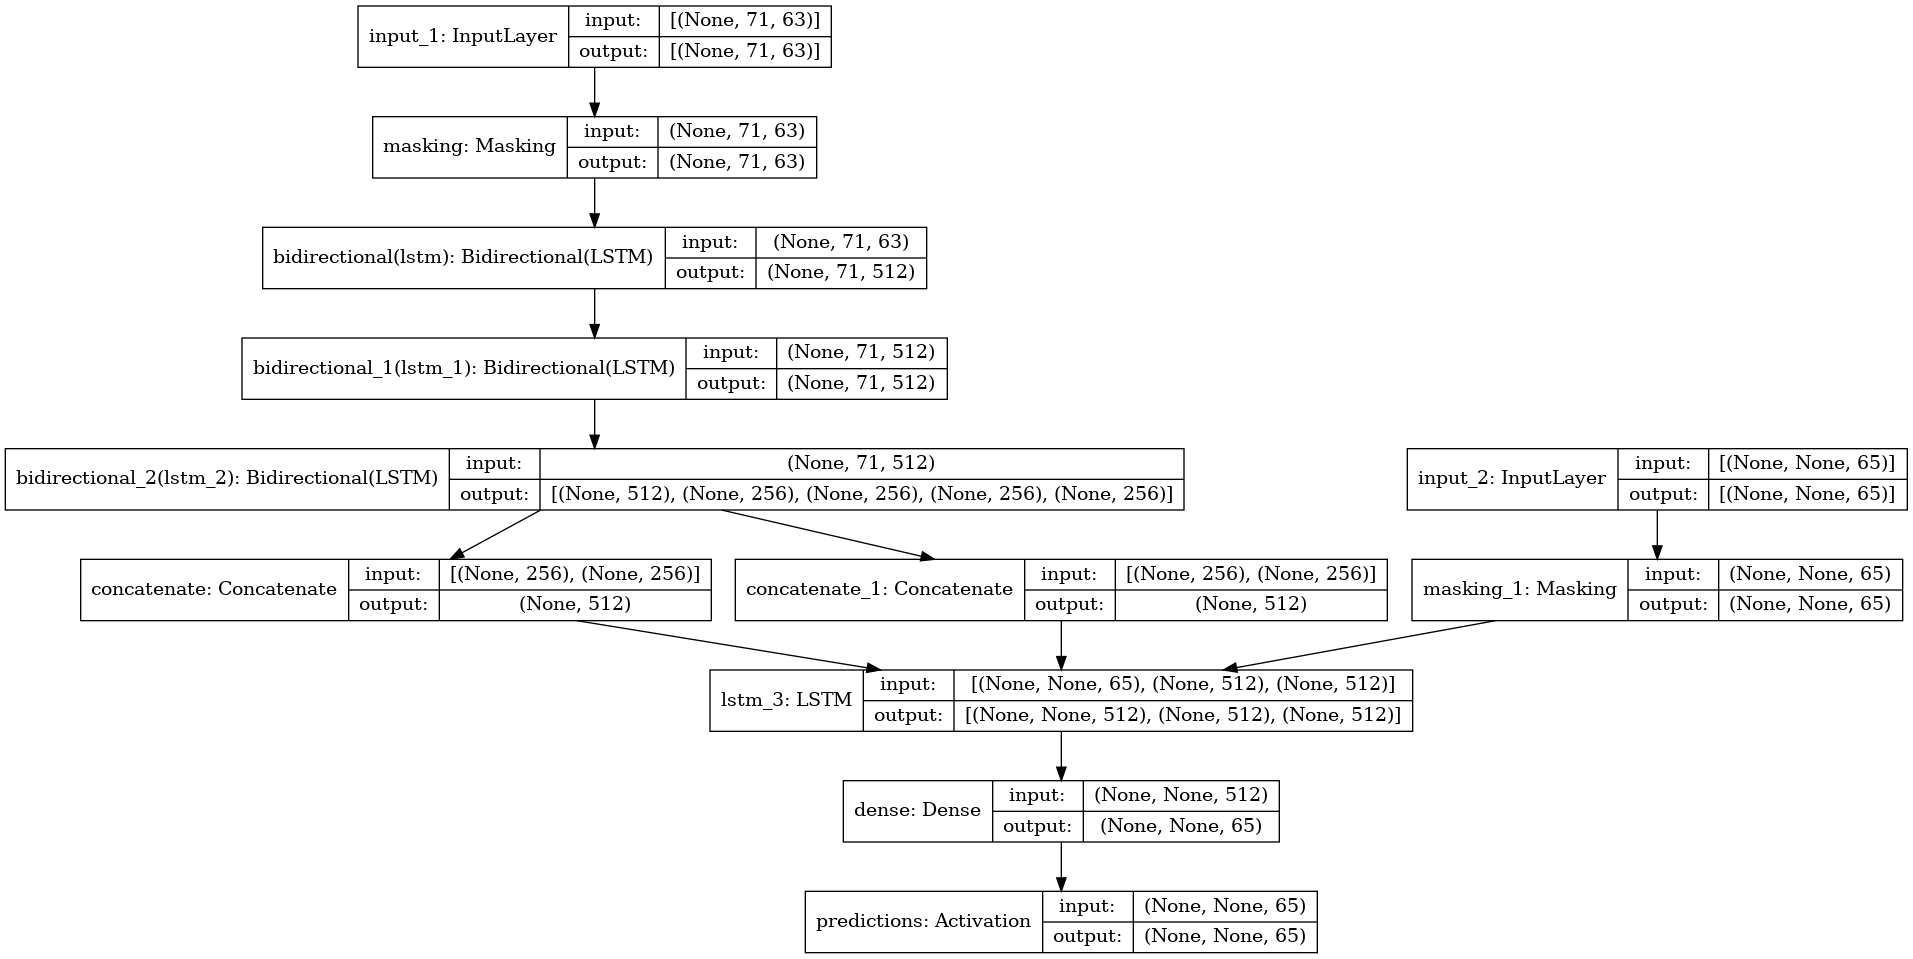

In [37]:
# Let us see the model in graphical form
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## Training the Model

In [38]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy']) 
# Alternatives: rmsprop, Adam (bad), Nadam (not good on multilayer)

callback_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler      = ReduceLROnPlateau(factor=0.6, patience=4)

In [39]:
# Do not run this line if no weights are saved!
#status = model.load_weights('weights') 

In [40]:
epoch_loop = 0
val_accuracy_previous = 0
break_counter = 0
val_accuracy_list = []
while epoch_loop < epochs:
    epoch_loop += 1
    print('Epoch:', epoch_loop)
    abc=0
    max_lines = len(lines)-1
    print('Lines to train on:', max_lines)
    outer_loop = np.ceil(max_lines/num_samples)  # Divide and round up (round up needed for small data sets to run)
    if outer_loop == 1:
        num_samples_in_loop = max_lines          # If max_lines is smaller than num_samples (small data sets)
    else:
        num_samples_in_loop = num_samples
    text_offset = 0
    while abc < outer_loop:
        
        text_offset = 0 + num_samples*abc
        if text_offset + num_samples > max_lines:       # adjust last piece so that last num_samples fits
            text_offset = max_lines - num_samples
        print('Line start:', text_offset, ' Line end: ', text_offset+num_samples)
        abc += 1
        
   
        encoder_input_data, decoder_input_data, decoder_target_data = make_trainingdata( 
                    lines, text_offset, num_samples_in_loop, max_encoder_seq_length, 
                    num_encoder_tokens, max_decoder_seq_length, num_decoder_tokens)  #input_texts_in_loop,input_texts,                    target_texts
                                                                              
    
        history = model.fit(
        [encoder_input_data, decoder_input_data],
        decoder_target_data,
        batch_size=batch_size,
        epochs=1, #epochs,
        #callbacks=[callback_stopping, lr_scheduler], #, tensorboard_cb],
        #verbose=2,
        validation_split=0.2)
        val_accuracy = history.history["val_accuracy"][0]
        val_accuracy_list.append(val_accuracy)
        if val_accuracy_previous < val_accuracy:
            val_accuracy_previous = val_accuracy
            break_counter = 0
            best_weights = model.get_weights()
        else:
            break_counter += 1
        if break_counter == 20:
            break
    model.save_weights('weights220225')
    if break_counter == 20:
        model.set_weights(best_weights)
        break    
    
        

Epoch: 1
Lines to train on: 2005347
Line start: 0  Line end:  100000


2022-02-26 02:04:38.370897: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-26 02:04:38.391784: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2999620000 Hz
2022-02-26 02:04:53.255613: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-02-26 02:04:53.853145: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2022-02-26 02:04:54.894460: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-02-26 02:04:55.638265: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-02-26 02:04:55.638336: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


157/157 [==============================] - 42s 152ms/step - loss: 1.5032 - accuracy: 0.6165 - val_loss: 1.0570 - val_accuracy: 0.7216
Line start: 100000  Line end:  200000
157/157 [==============================] - 18s 114ms/step - loss: 0.7936 - accuracy: 0.7916 - val_loss: 0.6237 - val_accuracy: 0.8411
Line start: 200000  Line end:  300000
157/157 [==============================] - 18s 115ms/step - loss: 0.5010 - accuracy: 0.8685 - val_loss: 0.4224 - val_accuracy: 0.8859
Line start: 300000  Line end:  400000
157/157 [==============================] - 18s 115ms/step - loss: 0.3782 - accuracy: 0.8965 - val_loss: 0.3538 - val_accuracy: 0.9013
Line start: 400000  Line end:  500000
157/157 [==============================] - 18s 115ms/step - loss: 0.3186 - accuracy: 0.9108 - val_loss: 0.2940 - val_accuracy: 0.9168
Line start: 500000  Line end:  600000
157/157 [==============================] - 18s 113ms/step - loss: 0.2715 - accuracy: 0.9236 - val_loss: 0.2622 - val_accuracy: 0.9259
Line s

157/157 [==============================] - 18s 112ms/step - loss: 0.0155 - accuracy: 0.9963 - val_loss: 0.0158 - val_accuracy: 0.9961
Line start: 600000  Line end:  700000
157/157 [==============================] - 18s 112ms/step - loss: 0.0151 - accuracy: 0.9964 - val_loss: 0.0171 - val_accuracy: 0.9957
Line start: 700000  Line end:  800000
157/157 [==============================] - 18s 113ms/step - loss: 0.0153 - accuracy: 0.9964 - val_loss: 0.0145 - val_accuracy: 0.9965
Line start: 800000  Line end:  900000
157/157 [==============================] - 18s 113ms/step - loss: 0.0150 - accuracy: 0.9965 - val_loss: 0.0156 - val_accuracy: 0.9963
Line start: 900000  Line end:  1000000
157/157 [==============================] - 18s 112ms/step - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0145 - val_accuracy: 0.9965
Line start: 1000000  Line end:  1100000
157/157 [==============================] - 18s 114ms/step - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0163 - val_accuracy: 0.9959
Lin

157/157 [==============================] - 18s 112ms/step - loss: 0.0105 - accuracy: 0.9977 - val_loss: 0.0101 - val_accuracy: 0.9976
Line start: 1100000  Line end:  1200000
157/157 [==============================] - 18s 114ms/step - loss: 0.0105 - accuracy: 0.9977 - val_loss: 0.0105 - val_accuracy: 0.9976
Line start: 1200000  Line end:  1300000
157/157 [==============================] - 18s 111ms/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 0.0108 - val_accuracy: 0.9975
Line start: 1300000  Line end:  1400000
157/157 [==============================] - 18s 112ms/step - loss: 0.0101 - accuracy: 0.9978 - val_loss: 0.0102 - val_accuracy: 0.9977
Line start: 1400000  Line end:  1500000
157/157 [==============================] - 18s 112ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.0104 - val_accuracy: 0.9977
Line start: 1500000  Line end:  1600000
157/157 [==============================] - 18s 114ms/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 0.0100 - val_accuracy: 0.9

# Save weights
model.save_weights('weights')

val_accuracy


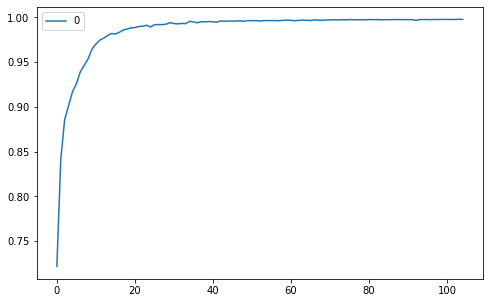

In [41]:
# Evaluate model
print("val_accuracy")
pd.DataFrame(val_accuracy_list).plot(figsize=(8,5))
plt.show()

In [42]:
# Create the test data one hot vectors
x_test1, x_test2, y_test = make_testdata(test_x, 
                           test_y, 0, len(test_x)-1,
                           max_encoder_seq_length, num_encoder_tokens, max_decoder_seq_length, num_decoder_tokens) 

In [43]:
# If your gpu runs out of memory, you can try uncommenting line below, for a TF_GPU_ALLOCATOR=cuda_malloc_async
#os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"

score = model.evaluate([x_test1, x_test2], y_test)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

6963/6963 [==============================] - 161s 22ms/step - loss: 0.0095 - accuracy: 0.9979
Test loss: 0.009541474282741547
Test accuracy: 0.9978694915771484


## Fixing Custom Sentences

In [44]:
# Change back to float32, to avoid errors when inferencing.
# Mixed precision does not work on all versions of Tensorflow
#policy = mixed_precision.Policy('float32')
#mixed_precision.set_global_policy(policy) 

In [45]:
# Build a new encoder
enc_inputs = Input(shape=(None, num_encoder_tokens))
enc_masking_layer = Masking(mask_value=0., input_shape=(max_encoder_seq_length, num_encoder_tokens))
enc_masked_inputs = enc_masking_layer(enc_inputs)
enc_1 = Bidirectional(LSTM(latent_dim, return_sequences=True, 
                               dropout=0.1, 
                               #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
                               #bias_regularizer=regularizers.l2(1e-4), 
                               #activity_regularizer=regularizers.l2(1e-5), 
                               input_shape=(None, num_encoder_tokens)
                               ))(enc_masked_inputs)

enc_2 = Bidirectional(LSTM(latent_dim, return_sequences=True, 
                               dropout=0.1, 
                               #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
                               #bias_regularizer=regularizers.l2(1e-4), 
                               #activity_regularizer=regularizers.l2(1e-5),
                               ))(enc_1)
enc_3 = Bidirectional(LSTM(latent_dim, return_state=True, 
                               dropout=0.1,
                               #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
                               #bias_regularizer=regularizers.l2(1e-4),
                               #activity_regularizer=regularizers.l2(1e-5),
                               ))

enc_outputs, forw_h, forw_c, backw_h, backw_c  = enc_3(enc_2)
st_h = Concatenate()([forw_h, backw_h]) 
st_c = Concatenate()([forw_c, backw_c]) 
enc_states = [st_h, st_c]
enc_model = Model(enc_inputs, enc_states)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, 63)]   0                                            
__________________________________________________________________________________________________
masking_2 (Masking)             (None, None, 63)     0           input_3[0][0]                    
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, None, 512)    655360      masking_2[0][0]                  
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, None, 512)    1574912     bidirectional_3[0][0]            
____________________________________________________________________________________________

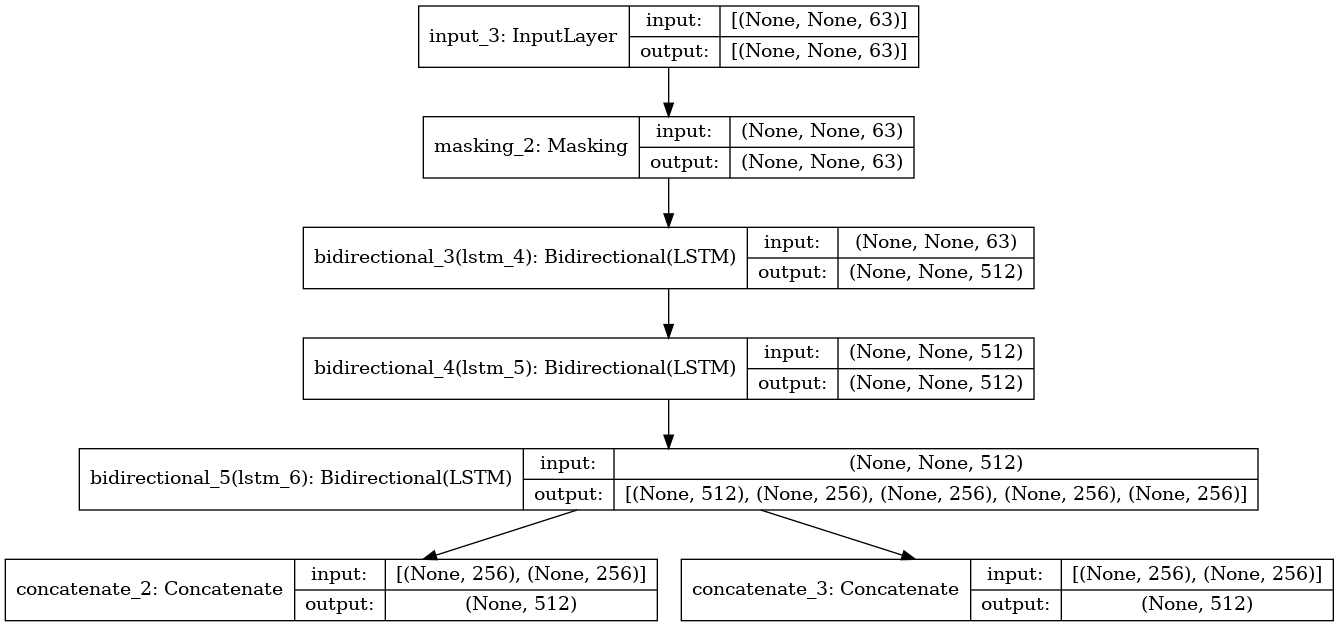

In [46]:
enc_model.summary()
tf.keras.utils.plot_model(enc_model, show_shapes=True, show_layer_names=True)

In [47]:
for layer in model.layers:
    print(layer.name)

input_1
masking
bidirectional
bidirectional_1
input_2
bidirectional_2
masking_1
concatenate
concatenate_1
lstm_3
dense
predictions


In [48]:
# Get the weights from the training model and set them in the inference model.
# Not all layers have weights, get from those layers that have weights.
enc_model.layers[2].set_weights(model.layers[2].get_weights())
enc_model.layers[3].set_weights(model.layers[3].get_weights())
enc_model.layers[4].set_weights(model.layers[5].get_weights())

In [49]:
# Build a new decoder, with three inputs, and one output
dec_inputs        = Input(shape=(None, num_decoder_tokens))
dec_masking_layer = Masking(mask_value=0., input_shape=(None, num_decoder_tokens))
dec_masked_inputs = dec_masking_layer(dec_inputs)
dec_state_input_h = Input(shape=(latent_dim*2,)) # *2 because of concat on Bidirectional
dec_state_input_c = Input(shape=(latent_dim*2,)) # *2 because of concat on Bidirectional
dec_states_inputs = [dec_state_input_h, dec_state_input_c]
# We set up our decoder to return full output sequences,
# and to return internal states as well. We did not use the
# return states in the training model, but we use them in inference.
dec_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True)  # *2 because of concat on Bidirectional
dec_output, final_memory_state, final_carry_state  = dec_lstm(dec_masked_inputs, initial_state=dec_states_inputs)
dec_states = [final_memory_state, final_carry_state]                       

dec_dense = Dense(num_decoder_tokens)(dec_output)
dec_outputs = Activation('softmax', dtype='float32', name='predictions')(dec_dense)

dec_model = Model(
    [dec_inputs] + dec_states_inputs,
    [dec_outputs] + dec_states)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, 65)]   0                                            
__________________________________________________________________________________________________
masking_3 (Masking)             (None, None, 65)     0           input_4[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 512)]        0                                            
____________________________________________________________________________________________

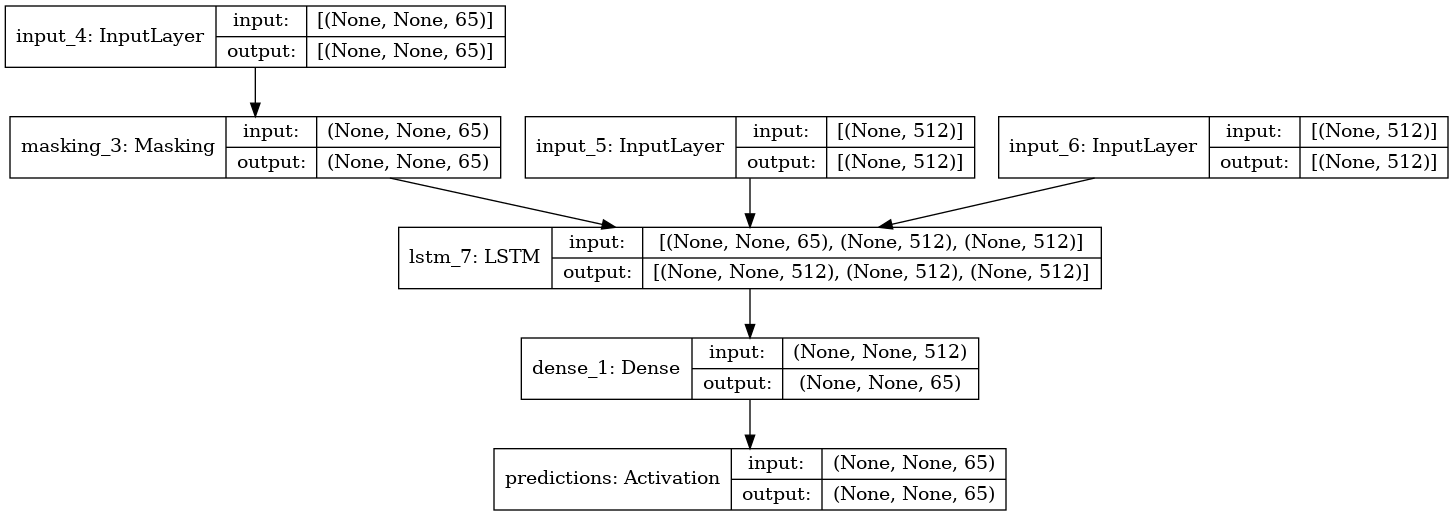

In [50]:
# Let us see the decoder model in graphical form
dec_model.summary()
tf.keras.utils.plot_model(dec_model, show_shapes=True, show_layer_names=True)

In [51]:
# Let us look att the names of the different layers
for layer in dec_model.layers:
    print(layer.name)

input_4
masking_3
input_5
input_6
lstm_7
dense_1
predictions


In [52]:
# Get the weights from the model and set them in the decoder                      
dec_model.layers[4].set_weights(model.layers[9].get_weights())
dec_model.layers[5].set_weights(model.layers[10].get_weights())

In [53]:
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = enc_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens), dtype="float32")
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = dec_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens), dtype="float32")
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [54]:
print()
print("From test set:")
for seq_index in range(20):
    # Take one sequence (part of the test set)
    # for trying out decoding.
    input_seq = x_test1[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input   sentence:', test_x[seq_index])
    print('Decoded sentence:', decoded_sentence)
    


From test set:
-
Input   sentence: Klimatförhållandena i området är arida.
Decoded sentence: Klimatförhållandena i området är arida.

-
Input   sentence: På den tiden bodde han i Genua.
Decoded sentence: På den tiden bodde han i Genua.

-
Input   sentence: Terrängen på Otok Olib är  platt.
Decoded sentence: Terrängen på Otok Olib är platt.

-
Input   sentence: Elite Hockey Prospects.
Decoded sentence: Elite Hockey Prospects.

-
Input   sentence: Arten är reproducerande i Sverige.
Decoded sentence: Arten är reproducerande i Sverige.

-
Input   sentence: Klimatet i område tär tempererat.
Decoded sentence: Klimatet i området är tempererat.

-
Input   sentence: Inlandsklimat råder i trakte.n
Decoded sentence: Inlandsklimat råder i trakten.

-
Input   sentence: Punta Tasbapauni äär en udde i Honduras.
Decoded sentence: Punta Tasbapauni är en udde i Honduras.

-
Input   sentence: Geografiskt ligger öarna i Melanesien.
Decoded sentence: Geografiskt ligger öarna i Melanseien.

-
Input   sente